# Homework 1
### JP Zamanillo

In [1]:
import pandas as pd
import numpy as np

### Q.1.20

##### a. Obtain the estimated regression function.

In [2]:
df = pd.read_table("CH01PR20.txt")
df.columns = "x y".split()
df.head()

,x,y
0,20 2,NaN
1,60 4,NaN
2,46 3,NaN
3,41 2,NaN
4,12 1,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       45 non-null     object 
 1   y       0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 848.0+ bytes


In [4]:
def splitter_second(num):
    '''Turns a float object into a string and then returns the second item'''
    num = str(num)
    return num.split()[1]

In [5]:
df["y"] = df["x"].apply(splitter_second) # applying new function from above
df.head()

,x,y
0,20 2,2
1,60 4,4
2,46 3,3
3,41 2,2
4,12 1,1


In [6]:
df["x"] = df["x"].apply(lambda x: str(x.split()[0])) # removing old values from x col
for col in df.columns: # turning the values back to floats
    df[col] = df[col].apply(float)
df.head()

,x,y
0,20.0,2.0
1,60.0,4.0
2,46.0,3.0
3,41.0,2.0
4,12.0,1.0


In [7]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

Below, we'll seperate the predictor variable from the response variable as seperate objects.

In [8]:
X = np.array(df["x"]).reshape(-1, 1) # have to reshape the array for sklearn due to SLM
y = np.array(df["y"])

Now we can fit the linear model to the seperated data.

In [9]:
lm.fit(X, y) # fitting the model to predictor and response

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### b. Plot the estimated regression function and the data.  How well does the estimated regression function fit the data?

In [10]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use("fivethirtyeight")
import seaborn as sns

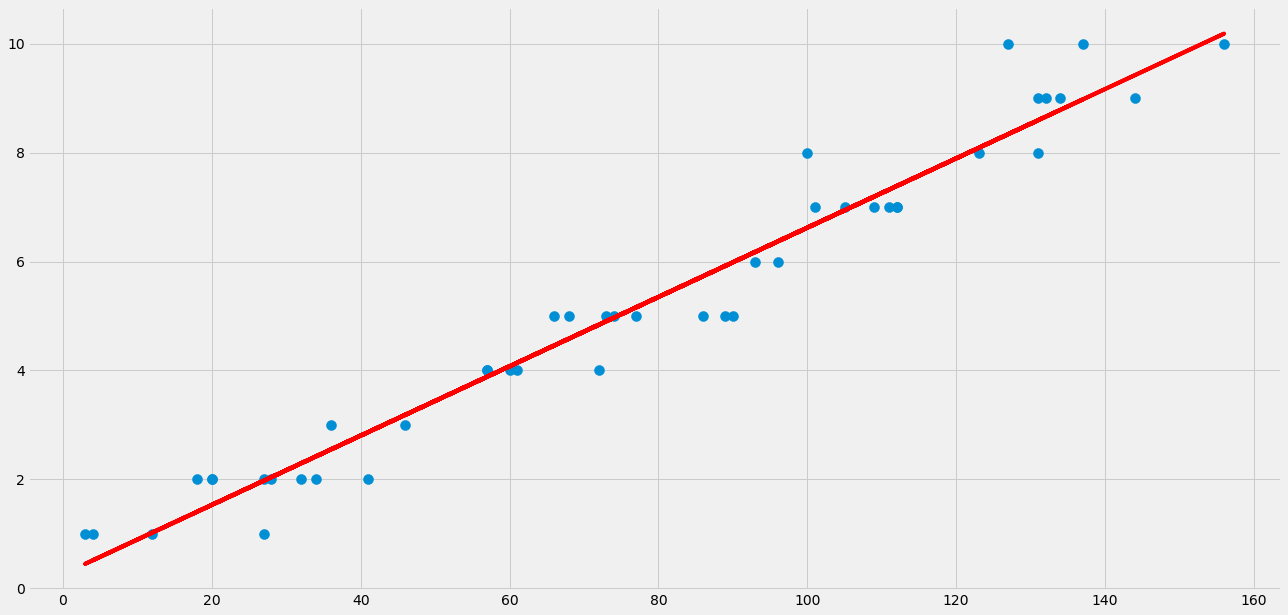

In [11]:
pred = lm.predict(X) # getting predictions from the model
plt.figure(figsize = (20, 10))
plt.scatter(X, y, s = 100)
plt.plot(X, pred, color='red')
plt.show()

At first glance, it appears that the line of best fit generated from the model fitting process represents the relationship between the variables justly.  In other words, if we were to hand draw a line through this scatterplot, out line would likely look very similar to the above plot soley based off intuition.

##### c. Interpret $\beta_0$ in your estimated regression function.  Does $\beta_0$ provide any relevant information here?  Explain.

In [12]:
print(f"Beta Zero: {lm.intercept_}")

Beta Zero: 0.2541916462351228


In this case, $\beta_0$ doesn't make much sense from a contextual standpoint.  What $\beta_0$ tells for this scenario is that a customer service agent will spend about 15 seconds on servicing a copier, even though there are no copiers to be serviced at $\beta_0$.

##### d. Obtain the point estimate of the mean service time when X = 5 copiers are serviced.

In [13]:
lm.predict(np.array(5).reshape(-1, 1)) # getting prediction at 5 copiers serviced

array([0.57260857])

The output above suggests that a customer service agent will tend to be on teh phone for a little over 30 seconds if they service 5 copiers.